# Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

## 1.  Make classification data and get it ready

In [83]:
import sklearn

In [84]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# make circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [85]:
len(X), len(y)

(1000, 1000)

In [86]:
print(f"Print 5 samples of X :\n  {X[:5]}")
print(f"Print 5 samples of y :\n {y[:5]}")

Print 5 samples of X :
  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Print 5 samples of y :
 [1 1 1 1 0]


In [87]:
# Make Data frame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "Label": y})
circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


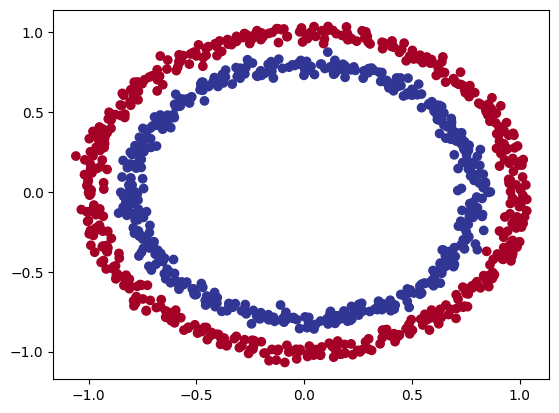

In [88]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

**Note** : The data we're working with is often referred to as a toy dataset, a dataset
that is small enough to experiment but still sizable enough to practice the fundamental.

### 1.1 Check Input and Output Shape

In [89]:
X.shape, y.shape

((1000, 2), (1000,))

In [90]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [91]:
# View the first examples of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and y: {y_sample}")
print(f"Shape of X: {X_sample.shape} and y.shape: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and y: 1
Shape of X: (2,) and y.shape: ()


### 1.2 Turn data into tensors and create train and test splits

In [92]:
import torch
torch.__version__

'2.7.1'

In [93]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [94]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [95]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [96]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,  # 0.2 mean 20% of data will be test and 80% will be train
                                                    random_state=42)

In [97]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.
To do so, we want to :
1. Setup device agnostic code
2. Create model class 
3. Define a loss function and optimizer
4. Create training and testing loop

In [98]:
# Import pytorch and nn
import torch
import torch.nn as nn

# Make a device agnostic code
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [99]:
X_train.shape

torch.Size([800, 2])

In [100]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 linear layers capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (x, y) and outputs 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and outputs 1 feature

    # 3. Define a forward() method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate model and send it to target device
model_0 = CircleModelV0()
model_0.to(device)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [101]:
next(model_0.parameters()).device

device(type='mps', index=0)

In [102]:
# let a replicate the model above using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [103]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='mps:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='mps:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='mps:0')),
             ('1.bias', tensor([-0.1213], device='mps:0'))])

In [104]:
#  Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test data: {len(X_test)}, Shape: {X_test.shape}")
print("\n")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"First 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test data: 200, Shape: torch.Size([200, 2])


First 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='mps:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup for optimization

Which loss function or Optimization function to use

For classification problems, we can use the following:
1. `torch.nn.BCELoss()` or `torch.nn.BCEWithLogitsLoss()` - for binary classification problems
2. `torch.nn.CrossEntropyLoss()` - for multi-class classification problems

In [105]:
# Setup loss function
# loss_fn = nn.BCELoss() # BCELoss = require inputs to have through the sigmoid activation function prior to input to BCELoss

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built in

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [106]:
# Calculate accuracy - out of 100 examples, what percentage our model gets right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train Model
To train our model, we are going to build a training loop with the following steps:
1. Forward pass (this is the model's prediction)
2. Calculate the loss (how wrong the model is)
3. Zero grad of the optimizer (this will zero out the gradients of the model)
4. Backward pass (this will calculate the gradient of the loss with respect to the model parameters)
5. Step the optimizer (this will update the model parameters based on the gradients)

### 3.1 Going from raw logits -> predictions probabilities -> prediction labels

Our model output are going to be raw **logits**. 

We can  convert the logits into prediction probabilities by passing them to some kind of activation function(eg : Sigmoid for binary and Softmax for multi-class classification).
Then we can convert the model predictions (probabilities) to **prediction labels** by prediction labels by either rounding them or taking the `argmax()`.

In [107]:
# View the 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logist = model_0(X_test.to(device))[:5]
y_logist

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='mps:0')

In [108]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [109]:
# Use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logist)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='mps:0')

For our prediction probabilities value, we need to perform range-style rounding on them:
* `y_pred_probs` >= 0.5 -, `y=1` (class 1)
* `y_pred_probs` < 0.5 -, `y=0` (class 0)


In [110]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logist -> pred prob -> pred label)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check the equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimensions
y_preds.squeeze()


tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 1., 0., 1.], device='mps:0')

In [111]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building training and testing loop


In [112]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Set the number of Epochs
epochs = 100

# Put data on the device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # Training
    model_0.train()
    
    # 1. Forward pass
    y_logist = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logist)) # Turn logist -> pred prob -> pred label

    # 2. Calculate loss/accuracy
    #loss = loss_fn(torch.sigmoid(y_logist), y_train) nn.BCELoss() expects prediction probabilities as input

    loss = loss_fn(y_logist, # nn.BCEWithLogitsLoss() accepts raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Zero grad
    optimizer.zero_grad()
    
    # 4. loss Backprop (backpropagation)
    loss.backward()
    
    # 5. Step the optimizer
    optimizer.step()
    
    # Testing
    model_0.eval()
    
    # Forward pass
    with torch.inference_mode():
        test_logist = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logist))
        
        test_loss = loss_fn(test_logist, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69796 | Acc: 51.88% | Test Loss: 0.69440 | Test Acc: 58.00%
Epoch: 10 | Loss: 0.69590 | Acc: 51.25% | Test Loss: 0.69305 | Test Acc: 53.00%
Epoch: 20 | Loss: 0.69490 | Acc: 51.62% | Test Loss: 0.69254 | Test Acc: 49.50%
Epoch: 30 | Loss: 0.69435 | Acc: 51.12% | Test Loss: 0.69236 | Test Acc: 49.50%
Epoch: 40 | Loss: 0.69401 | Acc: 50.88% | Test Loss: 0.69232 | Test Acc: 51.00%
Epoch: 50 | Loss: 0.69378 | Acc: 50.25% | Test Loss: 0.69234 | Test Acc: 50.00%
Epoch: 60 | Loss: 0.69362 | Acc: 50.00% | Test Loss: 0.69239 | Test Acc: 51.50%
Epoch: 70 | Loss: 0.69351 | Acc: 50.25% | Test Loss: 0.69246 | Test Acc: 51.00%
Epoch: 80 | Loss: 0.69342 | Acc: 49.88% | Test Loss: 0.69254 | Test Acc: 50.00%
Epoch: 90 | Loss: 0.69336 | Acc: 49.88% | Test Loss: 0.69262 | Test Acc: 53.00%


## 4. Make Predictions and evaluate the model

From the metrics it look like our model isn't learning anything...

So to inspect our model's predictions, let's make some predictions and compare them to the truth labels.

To do so, we're going to use `plot_decision_boundary()`.

In [113]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  print("Downloaded helper_functions.py")

# Import helper functions
from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


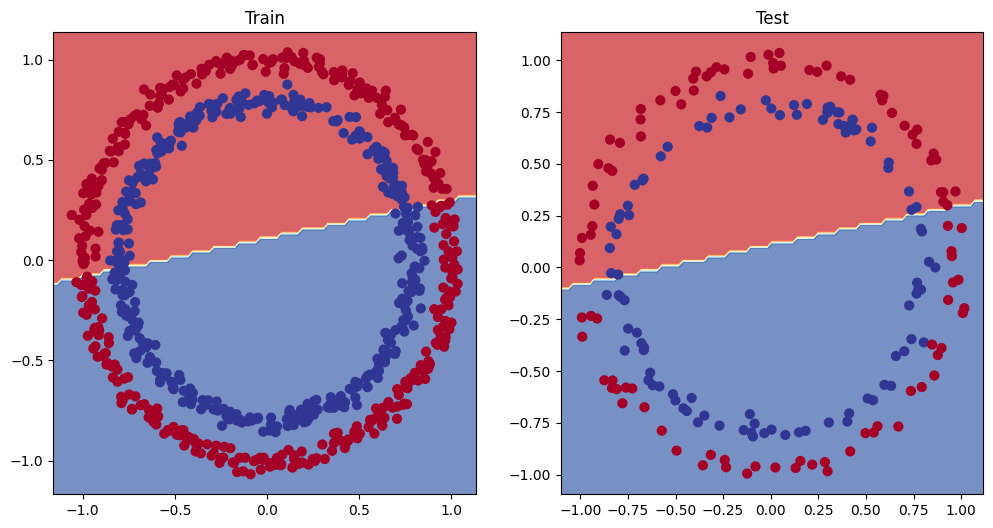

In [114]:
# Plot decision boundary to our model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.show()


## 5. Improving our model (from a model perspective)

* Add more layers - give the model more chance to learn complex patterns in the data
* Add more hidden units - allow model to learn even more complex patterns (8-16 is often a good number)
* Train for longer
* Chaning the activation functions
* Change the learning rate
* Change the loss function

There all options are all from a model perspective because they deal directly with the model, rather than the data.
And because there options are all values we (as machine learning engineer and data scientist) can change, they referred as  **hyperparameters**.

In [115]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.Linear(in_features=10, out_features=10),
            nn.Linear(in_features=10, out_features=1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [116]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [117]:
# Write Training Loop
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Train for longer
epochs = 1000

# Put data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    
    # Put model in training mode
    model_1.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_logist = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logist))
        
        test_loss = loss_fn(test_logist, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test Loss: 0.69437 | Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test Loss: 0.69458 | Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69465 | Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69467 | Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%


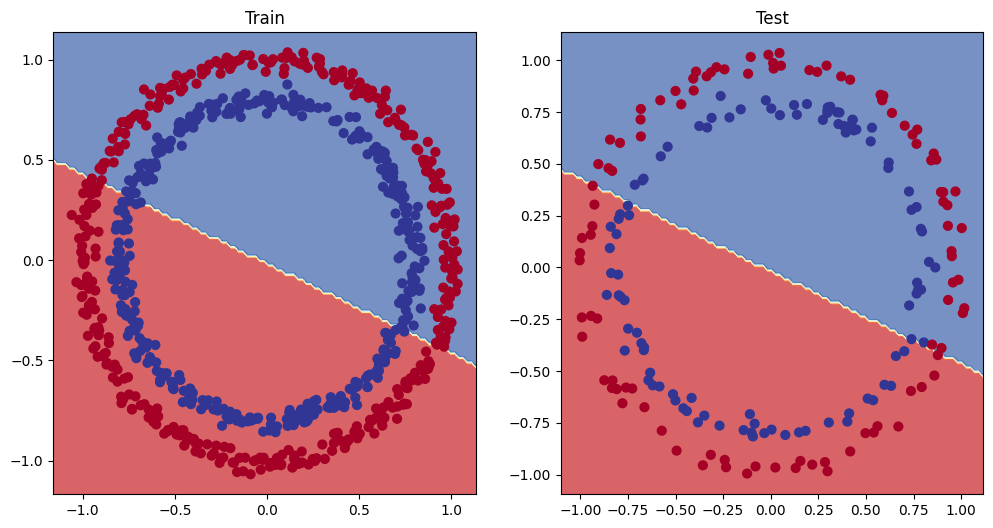

In [118]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()

### 5.1 Preparing Data to see if our model can fit a straight line

Our way to troubleshoot to a larger problem is to test out a smaller problem.

In [119]:
# Create some data 
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
print(X_regression[:10], y_regression[:10])

100
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])


In [120]:
# Create train and split datasets
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the length of each
print(len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression))


80 80 20 20


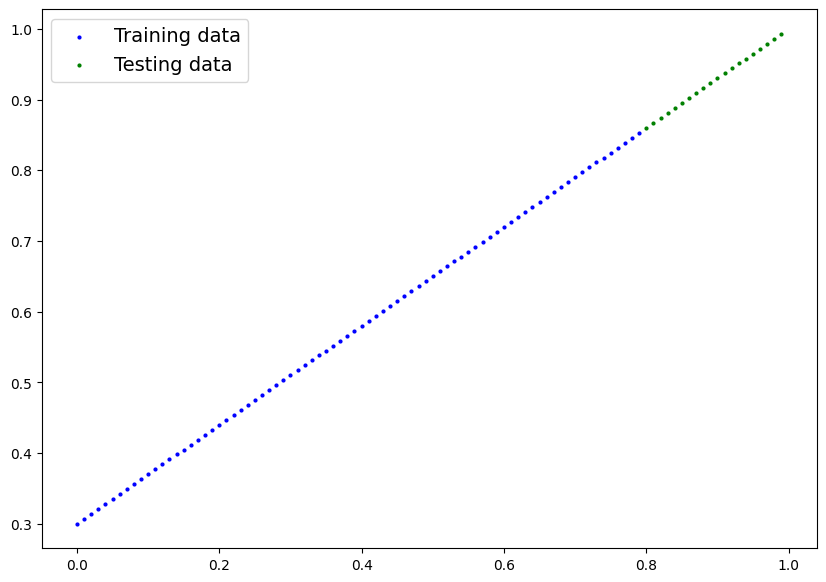

In [121]:
plot_predictions(train_data = X_train_regression, 
                    train_labels = y_train_regression,
                    test_data = X_test_regression,
                    test_labels = y_test_regression,
)

### 5.2 Adjusting `model_1` to fit a straight line

In [122]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [123]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.01)


In [124]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

epochs = 1000

X_train_regression = X_train_regression.to(device)
y_train_regression = y_train_regression.to(device)

X_test_regression = X_test_regression.to(device)
y_test_regression = y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


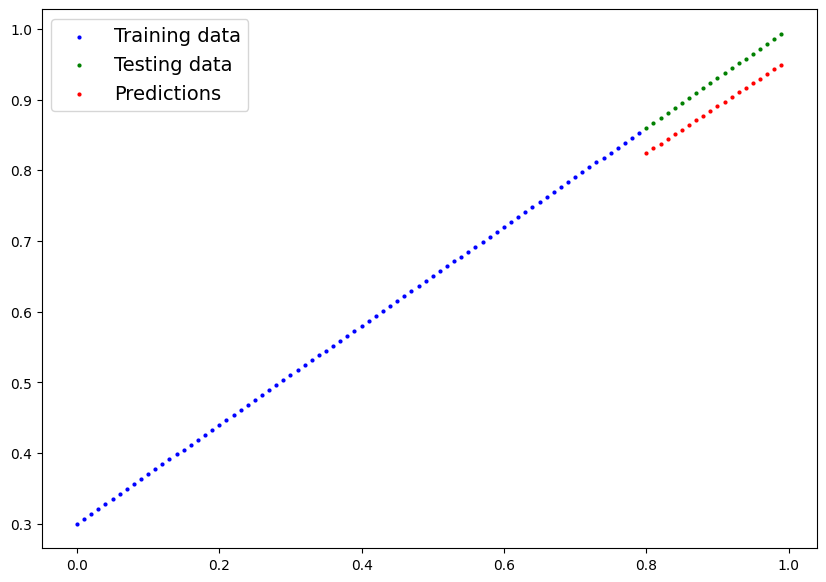

In [125]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6 The Missing Piece : Non-linearities

" What patterns could you draw if you were given an infinite amount of staright and non-linear lines?"

Or in machine learning terms, an infinity (but really it is finite) of linear and non-linear lines?

### 6.1 Recreating non linear data ( red and blue circles)

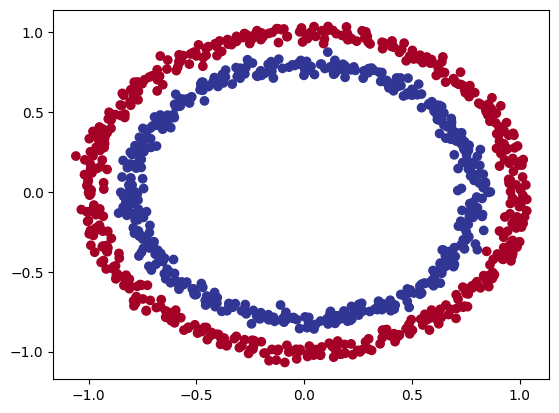

In [126]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [127]:
# Convert data to tensors and then train and split
import torch
from sklearn.model_selection import train_test_split


# Turn into tensors
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], X_test[:5], y_train[:5], y_test[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([1., 0., 1., 0., 1.]))

### 6.2 Building a model with non-linear layers

* Linear = Linear layer (also called a fully connected layer)
* Non-linear = Non-linear layer (also called a non-linear activation layer)

In [128]:
# Build a model with non linear activation function

from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=100)
        self.layer_2 = nn.Linear(in_features=100, out_features=100)
        self.layer_3 = nn.Linear(in_features=100, out_features=100)
        self.layer_4 = nn.Linear(in_features=100, out_features=100)
        self.layer_5 = nn.Linear(in_features=100, out_features=100)
        self.layer_6 = nn.Linear(in_features=100, out_features=1)
        self.relu = nn.ReLU() # relu is the non linear activation function
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Where should we put our non linear activation functions?
        return self.layer_6(self.relu(self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=100, bias=True)
  (layer_4): Linear(in_features=100, out_features=100, bias=True)
  (layer_5): Linear(in_features=100, out_features=100, bias=True)
  (layer_6): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [129]:
# Setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linear data

In [130]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Put all data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Loop through all data
epochs = 100
for epoch in range(epochs):
    model_3.train()

    # 1. Forward pass
    y_logist = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logist))

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logist, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
        test_logist = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logist))

        test_loss = loss_fn(test_logist, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
    

Epoch: 0 | Loss: 0.69319, Acc: 50.00% | Test Loss: 0.69336, Test Acc: 50.00%
Epoch: 10 | Loss: 0.69305, Acc: 50.00% | Test Loss: 0.69324, Test Acc: 50.00%
Epoch: 20 | Loss: 0.69296, Acc: 50.00% | Test Loss: 0.69318, Test Acc: 50.00%
Epoch: 30 | Loss: 0.69291, Acc: 50.00% | Test Loss: 0.69314, Test Acc: 50.00%
Epoch: 40 | Loss: 0.69286, Acc: 58.25% | Test Loss: 0.69312, Test Acc: 55.50%
Epoch: 50 | Loss: 0.69283, Acc: 57.38% | Test Loss: 0.69310, Test Acc: 52.00%
Epoch: 60 | Loss: 0.69280, Acc: 55.12% | Test Loss: 0.69308, Test Acc: 48.50%
Epoch: 70 | Loss: 0.69276, Acc: 54.12% | Test Loss: 0.69306, Test Acc: 48.00%
Epoch: 80 | Loss: 0.69273, Acc: 54.62% | Test Loss: 0.69305, Test Acc: 50.00%
Epoch: 90 | Loss: 0.69270, Acc: 55.12% | Test Loss: 0.69303, Test Acc: 49.50%


### 6.4 Evaluation a model trained with non-linear layer

In [131]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 1., 0., 1., 0., 0., 1., 1., 0., 1.], device='mps:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'))

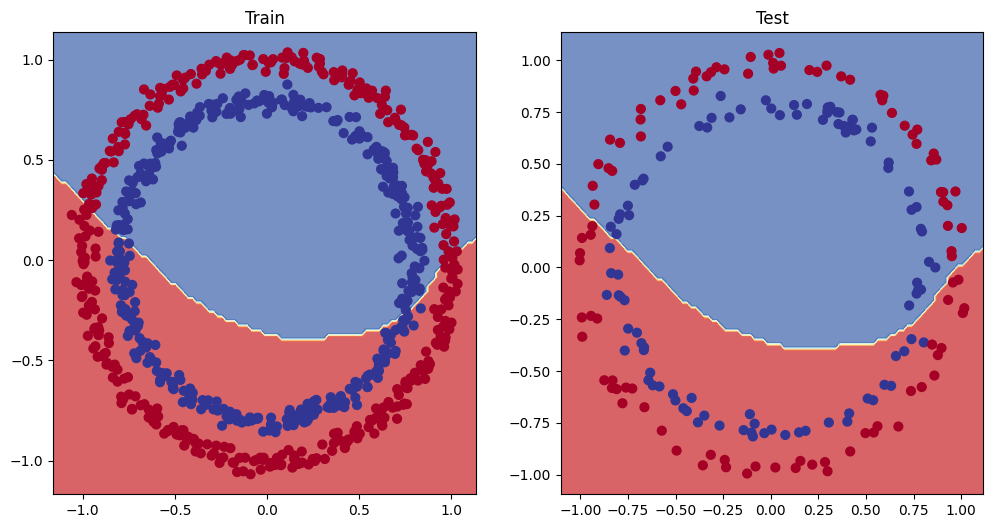

In [132]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X_train, y_train)
plt.title("Train")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X_test, y_test)
plt.title("Test")
plt.show()

## 7. Replicating non-linear activation functions

In [133]:
# Create a tensors
A = torch.arange(-10, 10, 1, dtype=torch.float32)

In [134]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

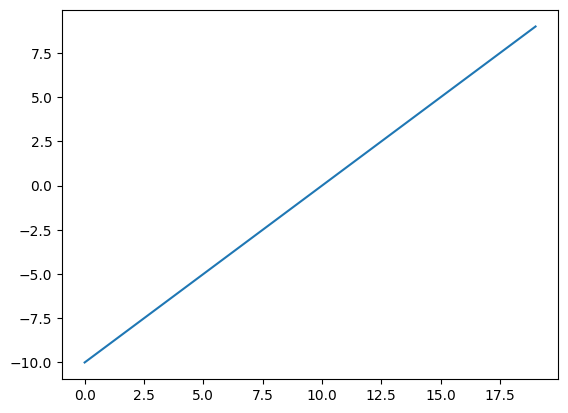

In [135]:
# Visualize
plt.plot(A)

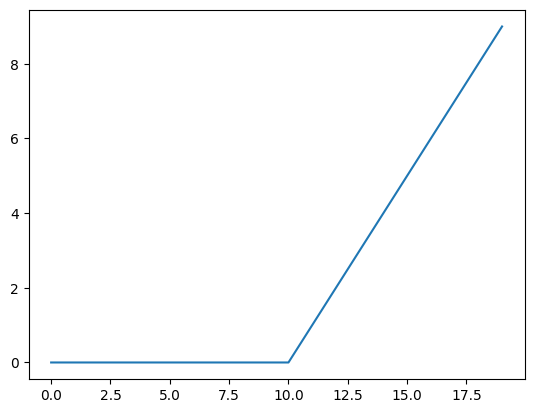

In [136]:
plt.plot(torch.relu(A))

In [137]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [138]:
def relu(x : torch.Tensor) -> torch.Tensor:
    return torch.max( torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

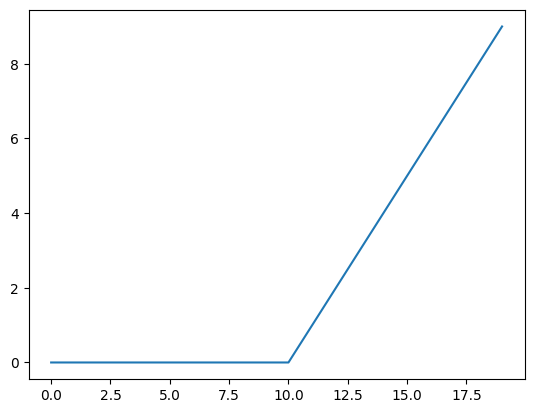

In [139]:
plt.plot(relu(A))

In [140]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

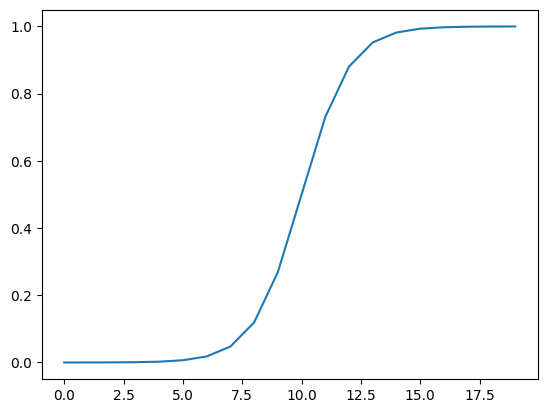

In [141]:
plt.plot(torch.sigmoid(A))

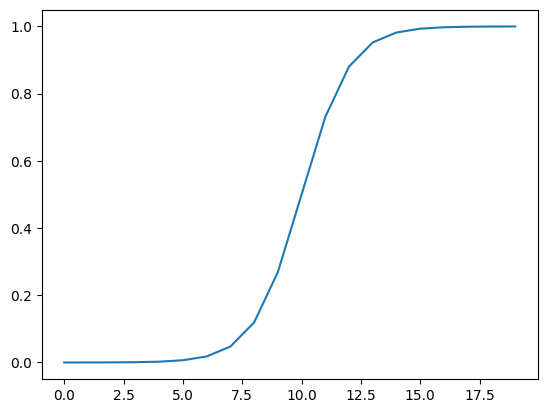

In [142]:
plt.plot(sigmoid(A))

## 8. Putting All together with a multi-class classification problem

* Binary Classification = one thing or another (cat vs dog, spam or not spam)
* Multi-class Classification = more than one thing or another (cat vs dog vs rabbit)

### 8.1 Create a toy multi-class data set

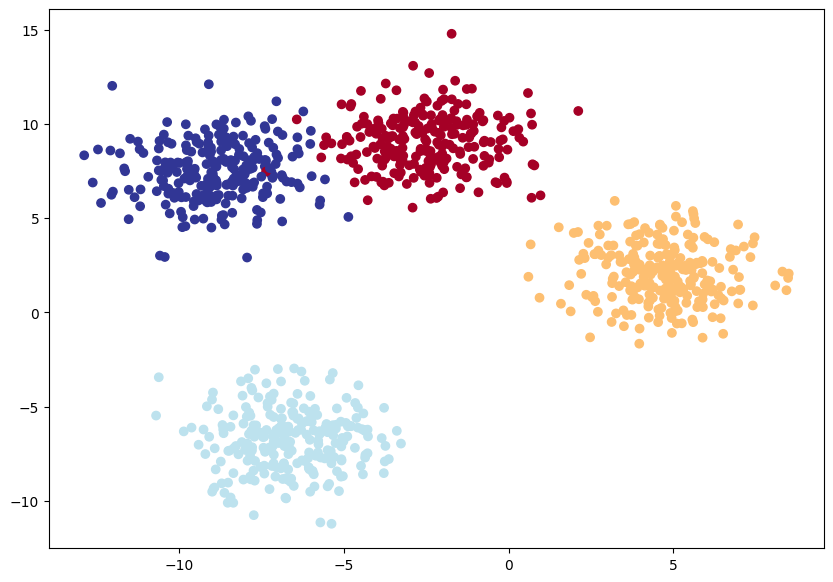

In [143]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.int)

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


### 8.2 Building a multi-class classification model

In [144]:
# Create device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [145]:
# Build Multi-class classification
class BaseModel(nn.Module):
    def __init__(self, input_features: int, hidden_units: int, output_features: int):
        """ initialize multi-class classification model
        
        Args:
            input_features (int): number of input features
            hidden_units (int): number of hidden units
            output_features (int): number of output features

        """
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

model_4 = BaseModel(input_features=2, hidden_units=8, output_features=4).to(device)
model_4

BaseModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [146]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

### 8.3 Create Loss Function and Optimizer for multi-class classification

In [147]:
# Create loss fun
loss_fn = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)


### 8.4 Getting predictions probabilities for PyTorch multi-class model

In order to evaluate our model's predictions, we need to convert our model's raw outputs (logits) into probabilities. We can do this using the softmax function.

`Logits`(raw outputs of model) -> `Pred Prob` (using softmax) -> `Pred Label` (using argmax)

In [148]:
# Let's get some raw outputs of our model (logits)

model_4.eval()
with torch.inference_mode():
    y_logists = model_4(X_blob_test.to(device))

y_logists[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='mps:0')

In [149]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], dtype=torch.int32)

In [150]:
# Convert our model logits to prediction probabilities
y_pred_probs = torch.softmax(y_logists, dim=1)
print(y_logists[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='mps:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='mps:0')


In [151]:
# Convert our model's predictions probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='mps:0')

In [152]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], dtype=torch.int32)

### 8.5 Training Loop and Testing Loop

In [153]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

# Create Training Loop
epochs = 1000

# Put data to target device
X_blob_train = X_blob_train.to(device)
y_blob_train = y_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_test = y_blob_test.to(device)

for epoch in range(epochs):
    # Train
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    # Testing
    model_4.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        # 2. Calculate loss and accuracy
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)
        
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883, Accuracy: 40.38% | Test Loss: 1.07554, Test Accuracy: 48.00%
Epoch: 100 | Loss: 0.03312, Accuracy: 99.25% | Test Loss: 0.02433, Test Accuracy: 99.50%
Epoch: 200 | Loss: 0.02657, Accuracy: 99.25% | Test Loss: 0.01651, Test Accuracy: 99.50%
Epoch: 300 | Loss: 0.02503, Accuracy: 99.25% | Test Loss: 0.01440, Test Accuracy: 99.50%
Epoch: 400 | Loss: 0.02427, Accuracy: 99.25% | Test Loss: 0.01335, Test Accuracy: 99.50%
Epoch: 500 | Loss: 0.02377, Accuracy: 99.25% | Test Loss: 0.01269, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.02339, Accuracy: 99.25% | Test Loss: 0.01218, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.02307, Accuracy: 99.25% | Test Loss: 0.01179, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.02279, Accuracy: 99.25% | Test Loss: 0.01147, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.02253, Accuracy: 99.25% | Test Loss: 0.01120, Test Accuracy: 99.50%


### 8.6 Making and Evaluating a PyTorch multi-class classification model

In [154]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[ -2.3749,  10.9390, -10.2038, -11.3270],
        [ -2.1932,  -9.4839,  -6.3061,   5.2291],
        [ -4.9854,  -5.3790,   5.3841,  -4.3115],
        [ -3.0428,   8.1534,  -5.4971,  -6.6867],
        [  6.4906,  -2.8974, -12.3324,  -8.4672],
        [ -2.7721, -11.1927,  -7.4740,   6.3903],
        [ -4.3608,  -4.5814,   4.6891,  -3.5910],
        [  5.8020,  -6.8307,  -9.7351,  -4.1263],
        [ -6.3789,  -6.9228,   6.6640,  -5.5251],
        [  6.2825,  -5.5356, -10.3558,  -5.4746]], device='mps:0')

In [155]:
# Go raw logits ->  Predictions Probabilities 
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.6513e-06, 1.0000e+00, 6.5736e-10, 2.1380e-10],
        [5.9741e-04, 4.0734e-07, 9.7734e-06, 9.9939e-01],
        [3.1369e-05, 2.1163e-05, 9.9989e-01, 6.1547e-05],
        [1.3727e-05, 9.9998e-01, 1.1794e-06, 3.5895e-07],
        [9.9992e-01, 8.3718e-05, 6.6872e-09, 3.1905e-07],
        [1.0490e-04, 2.3108e-08, 9.5230e-07, 9.9989e-01],
        [1.1734e-04, 9.4113e-05, 9.9954e-01, 2.5338e-04],
        [9.9995e-01, 3.2634e-06, 1.7878e-07, 4.8776e-05],
        [2.1655e-06, 1.2569e-06, 9.9999e-01, 5.0858e-06],
        [9.9998e-01, 7.3700e-06, 5.9441e-08, 7.8336e-06]], device='mps:0')

In [156]:
# Go prediction probability -> prediction label
y_preds = y_pred_probs.argmax(dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')

In [157]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='mps:0', dtype=torch.int32)

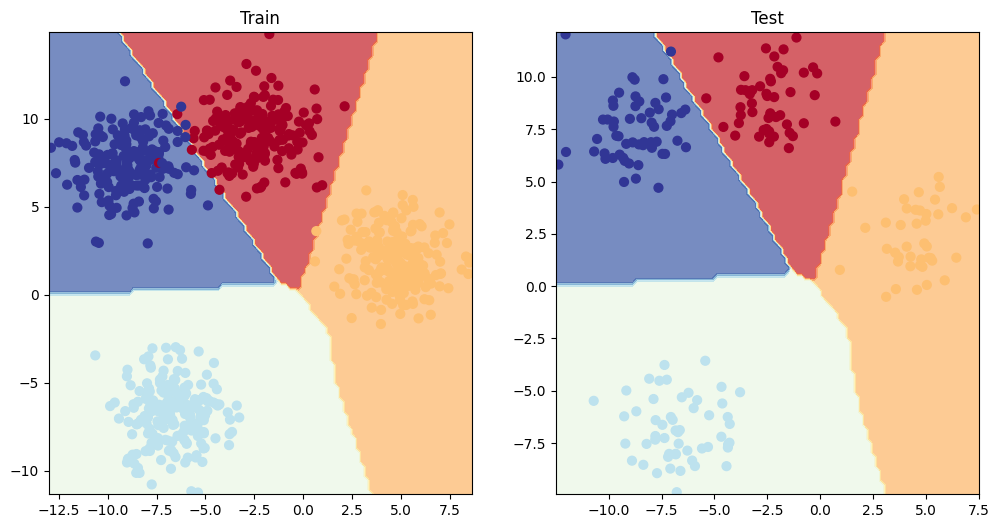

In [158]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.title("Train")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
plt.title("Test")
plt.show()

## 9. A few more classification metrics (to evaluate our model)

* Accuracy - out of 100 samples how many does our model get right
* Precision
* Recall
* F1 score
* Confusion matrix
* Classification report

See this article for when to use precision/recall - https://towardsdatascience.com/evaluation-metrics-for-classification-beyond-accuracy-1e20d8c76ba0/.

If you want access a PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/stable/

In [160]:
from torchmetrics import Accuracy

# setup metrics
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='mps:0')